In [1]:
#import libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#read my files

df_titles = pd.read_csv('titles.csv')
df_credits = pd.read_csv('credits.csv')

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [3]:
#create copies of the dataset 

dft = df_titles.copy()
dfc = df_credits.copy()

In [4]:
dft.shape

(5850, 15)

In [5]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

In [6]:
dft.isnull().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

In [7]:
dft['genres'] = dft['genres'].str.strip("[]").str.replace("'", "")
dft['production_countries'] = dft['production_countries'].str.strip("[]").str.replace("'", "")

In [8]:
dfc.shape

(77801, 5)

In [9]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77801 entries, 0 to 77800
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  77801 non-null  int64 
 1   id         77801 non-null  object
 2   name       77801 non-null  object
 3   character  68029 non-null  object
 4   role       77801 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.0+ MB


In [10]:
dfc.isnull().sum()

person_id       0
id              0
name            0
character    9772
role            0
dtype: int64

In [11]:
df_1522= dft[dft['release_year'] >= 2015]
df_1522['release_year'].unique()
df_1522.shape

(4729, 15)

In [12]:
directors = dfc[dfc['role'] == 'DIRECTOR']
directors.shape

(4550, 5)

In [13]:
df_combo = pd.merge(left = df_1522, right = directors, on = 'id', how = 'left')
df_combo

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,ts8,Better Call Saul,SHOW,Six years before Saul Goodman meets Walter Whi...,2015,TV-MA,49,"drama, crime",US,6.0,tt3032476,8.8,438575.0,273.296,8.500,NaN,NaN,NaN,NaN
1,ts37143,Alone,SHOW,Hardcore survivalists are put by themselves in...,2015,TV-MA,51,"reality, documentation",US,9.0,tt4803766,8.4,5037.0,26.930,7.000,NaN,NaN,NaN,NaN
2,ts38796,Stranger Things,SHOW,"When a young boy vanishes, a small town uncove...",2016,TV-14,61,"scifi, thriller, drama, fantasy, horror",US,5.0,tt4574334,8.7,1101055.0,2226.231,8.635,NaN,NaN,NaN,NaN
3,ts21867,Schitt's Creek,SHOW,Formerly filthy rich video store magnate Johnn...,2015,TV-14,22,comedy,CA,6.0,tt3526078,8.5,115758.0,25.254,7.600,NaN,NaN,NaN,NaN
4,ts41766,The Good Place,SHOW,"Eleanor Shellstrop, an ordinary woman who, thr...",2016,TV-14,23,"scifi, romance, comedy, drama, fantasy",US,4.0,tt4955642,8.2,152884.0,33.793,8.000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5165,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"romance, drama",NG,NaN,tt13857480,6.8,45.0,1.466,NaN,1962840.0,Seyi Babatope,NaN,DIRECTOR
5166,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,drama,,NaN,tt11803618,7.7,348.0,NaN,NaN,NaN,NaN,NaN,NaN
5167,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,comedy,CO,NaN,tt14585902,3.8,68.0,26.005,6.300,1950416.0,Julian Gaviria,NaN,DIRECTOR
5168,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,,US,NaN,NaN,NaN,NaN,1.296,10.000,NaN,NaN,NaN,NaN


In [14]:
df_combo['id'].nunique()


4729

# Most popular films/ shows of all times based on IMDB score

In [88]:
dft.sort_values('imdb_score', ascending=False).head(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
2658,ts265844,#ABtalks,SHOW,#ABtalks is a YouTube interview show hosted by...,2018,TV-PG,68,,,1.0,tt12635254,9.6,7.0,NaN,NaN
216,ts4,Breaking Bad,SHOW,"When Walter White, a New Mexico chemistry teac...",2008,TV-MA,48,"drama, crime, thriller",US,5.0,tt0903747,9.5,1775990.0,353.848,8.79
564,ts160526,Khawatir,SHOW,A TV show devoted to help young people to be m...,2005,TV-14,19,reality,,11.0,tt3062514,9.5,3115.0,NaN,NaN
3147,ts85398,Our Planet,SHOW,Experience our planet's natural beauty and exa...,2019,TV-G,50,documentation,GB,1.0,tt9253866,9.3,42259.0,19.942,8.80
233,ts3371,Avatar: The Last Airbender,SHOW,"In a war-torn world of elemental magic, a youn...",2005,TV-Y7,24,"scifi, animation, action, family, fantasy",US,3.0,tt0417299,9.3,303666.0,56.915,8.70


# Most produced genres since 2015 - top 5

In [17]:
top5_produced = df_combo['genres'].value_counts().head(5)
top5_produced

genres
comedy            467
documentation     358
drama             279
comedy, drama     126
drama, romance    123
Name: count, dtype: int64

<Axes: title={'center': 'Top 5 most produced genres since 2015'}, xlabel='genres'>

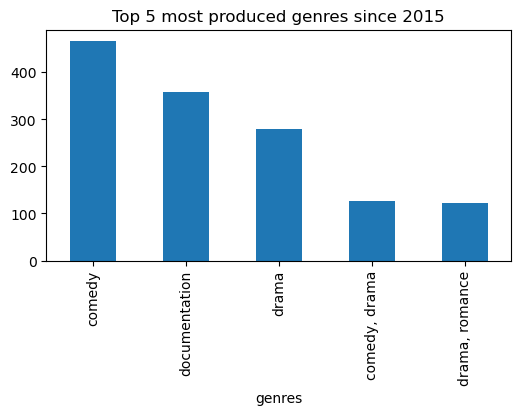

In [18]:
plt.figure(figsize = (6,3))
top5_produced.plot(kind = 'bar', title = 'Top 5 most produced genres since 2015')

# Most popular genres by IMDB score

In [19]:
most_popular_genres = df_combo.groupby('genres')['imdb_score'].mean().sort_values(ascending=False)
most_popular_genres

genres
scifi, action, drama, animation, fantasy                     9.0
action, drama, thriller, romance, comedy, fantasy, horror    8.8
animation, action, drama, war, history                       8.8
scifi, action, animation, horror, fantasy, thriller          8.7
drama, comedy, animation                                     8.7
                                                            ... 
scifi, animation, comedy, action                             NaN
scifi, documentation                                         NaN
thriller, comedy, romance                                    NaN
thriller, horror, animation, drama, european                 NaN
thriller, horror, european                                   NaN
Name: imdb_score, Length: 1404, dtype: float64

In [20]:
imdb8 = pd.DataFrame(most_popular_genres)
imdb8 = imdb8[imdb8['imdb_score'] >= 8]
imdb8.reset_index().head(10)

,genres,imdb_score
0,"scifi, action, drama, animation, fantasy",9.0
1,"action, drama, thriller, romance, comedy, fant...",8.8
2,"animation, action, drama, war, history",8.8
3,"scifi, action, animation, horror, fantasy, thr...",8.7
4,"drama, comedy, animation",8.7
5,"comedy, drama, music, reality",8.7
6,"scifi, crime, drama, thriller",8.7
7,"action, animation, comedy, fantasy, scifi, hor...",8.7
8,"drama, history, romance, war, action",8.7
9,"scifi, thriller, drama, fantasy, horror",8.7


In [120]:
dfimdb = df_combo.groupby('genres')[['imdb_score']].mean().sort_values('imdb_score',ascending = False).reset_index()
dfimdb8 = dfimdb[dfimdb['imdb_score']>= 8]
dfimdb8.head(10)
genreslist = dfimdb8['genres'].to_list()

In [121]:
genreslist[0:2]

['scifi, action, drama, animation, fantasy',
 'action, drama, thriller, romance, comedy, fantasy, horror']

In [124]:
l=[]
for element in genreslist:
    l.extend(element.split(','))
#l

In [125]:
uniquegenres = list(set(l))
uniquegenres

['thriller',
 ' war',
 ' action',
 ' documentation',
 'romance',
 ' music',
 'fantasy',
 'drama',
 'reality',
 ' scifi',
 ' family',
 'music',
 'scifi',
 ' fantasy',
 'animation',
 ' romance',
 ' sport',
 ' crime',
 ' comedy',
 ' thriller',
 'documentation',
 'war',
 'action',
 ' european',
 ' horror',
 ' history',
 'comedy',
 'crime',
 ' reality',
 ' animation',
 ' drama']

In [131]:
d={}
for g in uniquegenres:
    d[g] = l.count(g)

In [132]:
genresfrequency = {k: v for k, v in sorted(d.items(), key=lambda item: item[1], reverse = True)}

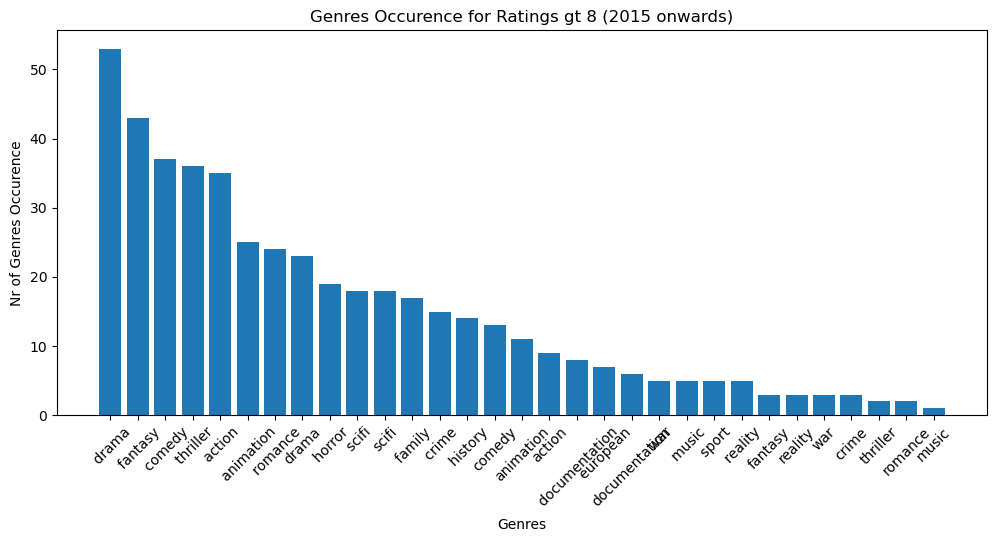

In [133]:
plt.figure(figsize=(12,5))
plt.title('Genres Occurence for Ratings gt 8 (2015 onwards)')
plt.xlabel('Genres')
plt.ylabel('Nr of Genres Occurence')
plt.bar(genresfrequency.keys(),genresfrequency.values())
plt.xticks(rotation=45)
None

# Breakdown and analysis for type column (movies/TV shows)?

In [109]:
df_combo[df_combo['type'] =='SHOW'].count()
prod_shows = df_combo[df_combo['type'] =='SHOW']
shows_total = prod_shows['id'].count()
shows_total

1954

In [108]:
prod_movies = df_combo[df_combo['type'] =='MOVIE']
movies_total = prod_movies['id'].count()
movies_total

3216

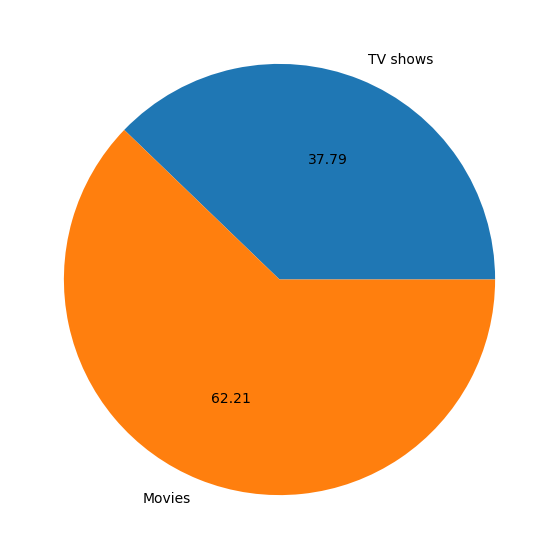

In [24]:
categories = ['TV shows', 'Movies']
 
data = [shows_total, movies_total]
 
# Creating plot
fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=categories, autopct='%.2f')
 
# show plot
plt.show()

In [25]:
imdb_type = df_combo.groupby('type')['imdb_score'].mean().sort_values(ascending=False)
imdb_type


type
SHOW     6.924409
MOVIE    6.149639
Name: imdb_score, dtype: float64

# Most popular directors based on IMDB score

In [87]:
#df_combo['name'].sort_values('imdb_score', ascending=False)
rate_directors = df_combo.dropna(subset = 'role').sort_values(by=['imdb_score', 'name'], ascending=False)
top10_directors_detailed = rate_directors[['name', 'imdb_score', 'type', 'title']].head(10)
top10_directors = rate_directors[['name', 'imdb_score']].head(10)
top10_directors_detailed

,name,imdb_score,type,title
141,Shin Won-ho,9.2,SHOW,Reply 1988
3957,Sashi Kiran Tikka,9.1,MOVIE,Major
2101,Jason Hehir,9.1,SHOW,The Last Dance
1542,Venkatesh Maha,8.9,MOVIE,C/o Kancharapalem
2316,Keith Scholey,8.9,MOVIE,David Attenborough: A Life on Our Planet
2317,Jonathan Hughes,8.9,MOVIE,David Attenborough: A Life on Our Planet
2318,Alastair Fothergill,8.9,MOVIE,David Attenborough: A Life on Our Planet
2257,Steve Cheng,8.8,SHOW,The Untamed
2256,Ka-Lam Chan,8.8,SHOW,The Untamed
4524,Han Dong-hwa,8.8,SHOW,Navillera


In [ ]:
#The most popular directors on Netflix, are mainly international but very well known series/films

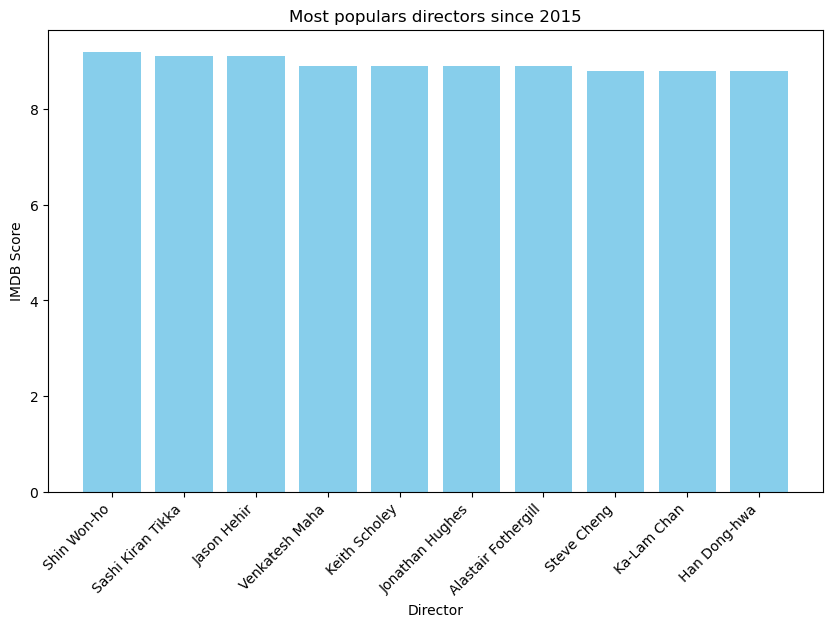

In [55]:
plt.figure(figsize=(10, 6))
plt.bar(top10_directors['name'], top10_directors['imdb_score'], color='skyblue')
plt.xlabel('Director')
plt.ylabel('IMDB Score')
plt.title('Most populars directors since 2015')
plt.xticks(rotation=45, ha='right')
plt.show()

# Duration (movies) & number of seasons (TV shows) analysis

In [64]:
prod_shows.isnull().sum()
#prod_shows

id                         0
title                      0
type                       0
description                8
release_year               0
age_certification        253
runtime                    0
genres                     0
production_countries       0
seasons                    0
imdb_id                  155
imdb_score               176
imdb_votes               176
tmdb_popularity           18
tmdb_score                83
person_id               1342
name                    1342
character               1954
role                    1342
dtype: int64

In [77]:
seasons_count = prod_shows['seasons'].value_counts()
seasons_count = seasons_count.reset_index()
seasons_count

,seasons,count
0,1.0,1265
1,2.0,376
2,3.0,160
3,4.0,79
4,5.0,43
5,6.0,20
6,7.0,6
7,9.0,2
8,8.0,2
9,11.0,1


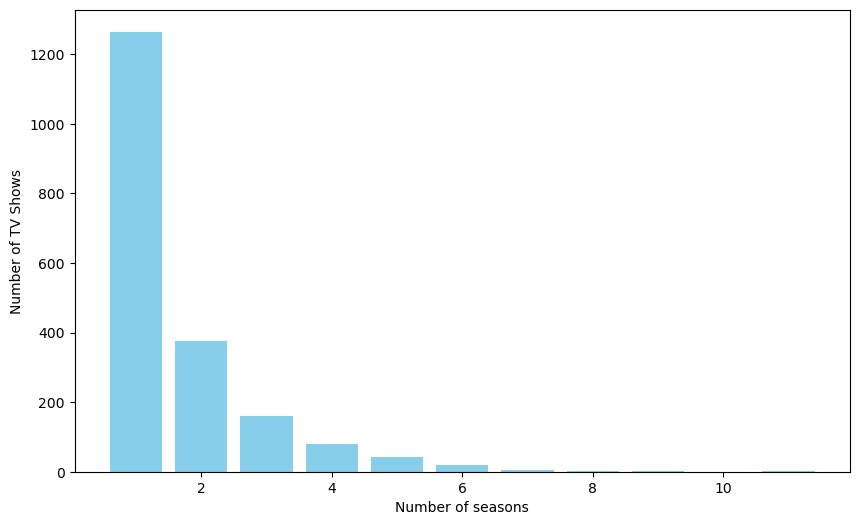

In [139]:
plt.figure(figsize=(10, 6))
plt.bar(seasons_count['seasons'], seasons_count['count'], color='skyblue')
plt.xlabel('Number of seasons')
plt.ylabel('Number of TV Shows')
plt.show()

<Axes: xlabel='seasons'>

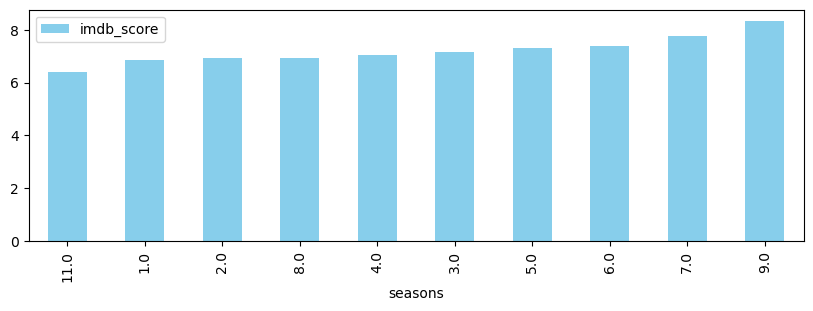

In [138]:
prod_shows.groupby('seasons')[['imdb_score']].mean().sort_values('imdb_score').plot.bar(figsize=(10,3),color='skyblue' )

In [80]:
df_temp_shows=prod_shows.groupby('title').mean(['imdb_score']).sort_values('imdb_score', ascending=False).head(10).reset_index()

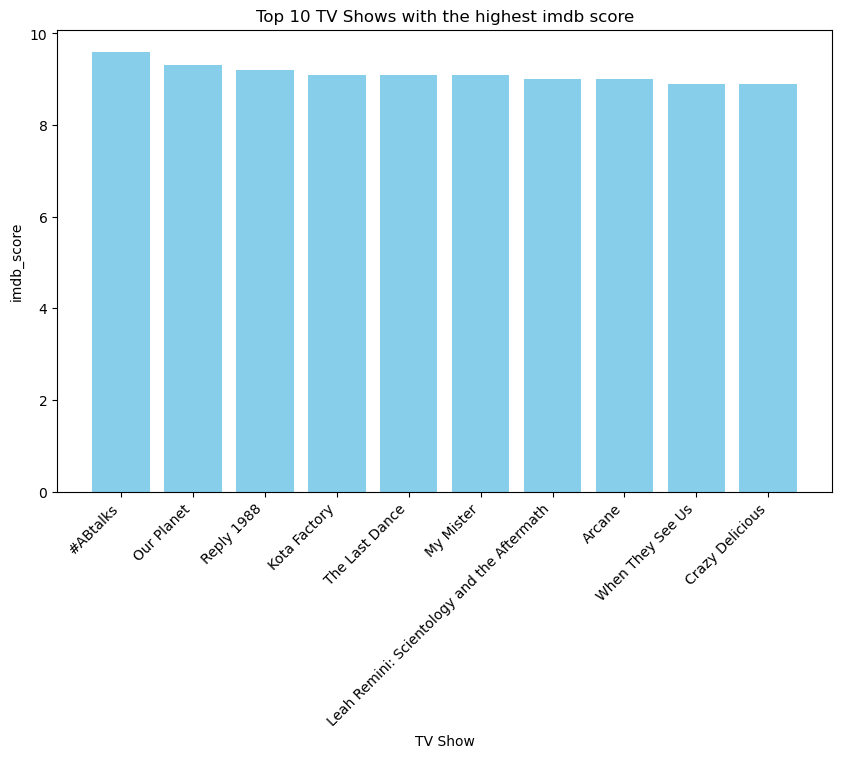

In [83]:
plt.figure(figsize=(10, 6))
plt.bar(df_temp_shows['title'], df_temp_shows['imdb_score'], color='skyblue')
plt.xlabel('TV Show')
plt.ylabel('imdb_score')
plt.title('Top 10 TV Shows with the highest imdb score')
plt.xticks(rotation=45, ha='right')
plt.show()

In [90]:
df_temp_movies = prod_movies.groupby('title').mean(['imdb_score']).sort_values('runtime', ascending=False).head(10).reset_index()
df_temp_movies.head(10)

,title,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id
0,The Irishman,2019.0,209.0,NaN,7.8,376379.0,21.075,7.600,3308.0
1,Jab Harry Met Sejal,2017.0,200.0,NaN,5.0,20593.0,8.529,6.500,53156.0
2,The Hateful Eight,2015.0,188.0,NaN,7.8,570138.0,26.531,7.737,2266.0
3,RRR,2022.0,187.0,NaN,8.0,87515.0,53.526,7.800,45443.0
4,Manu,2018.0,182.0,NaN,7.6,1081.0,1.400,7.000,957377.0
5,This Earth of Mankind,2019.0,181.0,NaN,6.8,747.0,2.346,7.300,66049.0
6,4K Fireplace,2015.0,181.0,NaN,7.7,49.0,0.738,6.800,NaN
7,Zero,2018.0,180.0,NaN,5.2,27346.0,6.890,5.300,124579.0
8,Jagga Jasoos,2017.0,180.0,NaN,6.3,10283.0,6.005,6.000,202602.0
9,How I Fell in Love with a Gangster,2022.0,179.0,NaN,6.0,2248.0,29.595,6.700,1122250.0


In [107]:
#df_temp_movies[df_temp_movies['runtime']>120]
df_temp_movies_120 = prod_movies.groupby('title').mean(['imdb_score']).sort_values('runtime', ascending=False).reset_index()
df_temp_movies_120 = df_temp_movies_120[df_temp_movies_120['runtime']>120]
count_scores_120 = [df_temp_movies_120['imdb_score'].unique()]
df_temp_movies_120['title'].count()

441

In [106]:
df_temp_movies_180 = prod_movies.groupby('title').mean(['imdb_score']).sort_values('runtime', ascending=False).reset_index()
df_temp_movies_180 = df_temp_movies_180[df_temp_movies_180['runtime']>180]
count_scores_180 = [df_temp_movies_180['imdb_score'].unique()]
df_temp_movies_180['title'].count()

7

In [134]:
df_temp_movies_2h = prod_movies.groupby('title').mean(['imdb_score']).sort_values('runtime', ascending=False).reset_index()
df_temp_movies_2h = df_temp_movies_2h[df_temp_movies_2h['runtime']<=120]
count_scores_2h = [df_temp_movies_2h['imdb_score'].unique()]
df_temp_movies_2h['title'].count()

2468

In [ ]:
# In general films not too many films with duriation more than 2h - in total 14%
#df_temp_movies_120['title'].count()/ movies_total

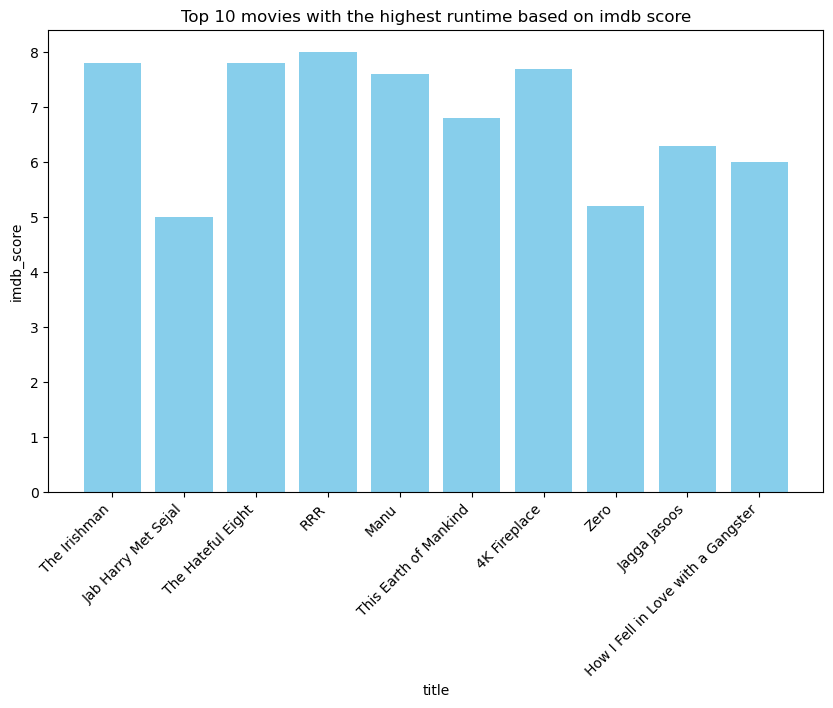

In [91]:
plt.figure(figsize=(10, 6))
plt.bar(df_temp_movies['title'], df_temp_movies['imdb_score'], color='skyblue')
plt.xlabel('title')
plt.ylabel('imdb_score')
plt.title('Top 10 movies with the highest runtime based on imdb score')
plt.xticks(rotation=45, ha='right')
plt.show()

# Runtime of about 180 minutes have an imdb score between 6.5 and 8, therefore Neftlix may need to invest in creating movies
#with less than 180 minutes runtime

In [112]:
df_temp_movies1=prod_movies.groupby('title').mean(['imdb_score']).sort_values('imdb_score', ascending=False).head(10).reset_index()
df_temp_movies1
#df_temp=prod_movie.groupby('title').mean(['imdb_score']).sort_values('imdb_score', ascending=False).head(10).reset_index()


,title,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id
0,Major,2022.0,149.0,NaN,9.1,7576.0,6.429,8.188,937765.0
1,C/o Kancharapalem,2018.0,152.0,NaN,8.9,6842.0,2.145,7.600,951125.0
2,David Attenborough: A Life on Our Planet,2020.0,83.0,NaN,8.9,31625.0,15.935,8.500,488599.0
3,Bo Burnham: Inside,2021.0,87.0,NaN,8.7,44074.0,11.434,8.200,308.0
4,In Our Mothers' Gardens,2021.0,84.0,NaN,8.6,132.0,2.079,NaN,1904729.0
5,The Art of Incarceration,2019.0,90.0,NaN,8.6,25.0,0.664,NaN,2418135.0
6,Rubaru Roshni,2019.0,110.0,NaN,8.6,591.0,1.489,7.700,NaN
7,Merku Thodarchi Malai,2018.0,122.0,NaN,8.6,1818.0,2.158,7.400,230796.0
8,"Best Wishes, Warmest Regards: A Schitt's Creek...",2020.0,44.0,NaN,8.6,1445.0,3.016,8.900,1396414.0
9,A Second Chance,2015.0,130.0,NaN,8.6,47.0,2.752,7.100,141692.0


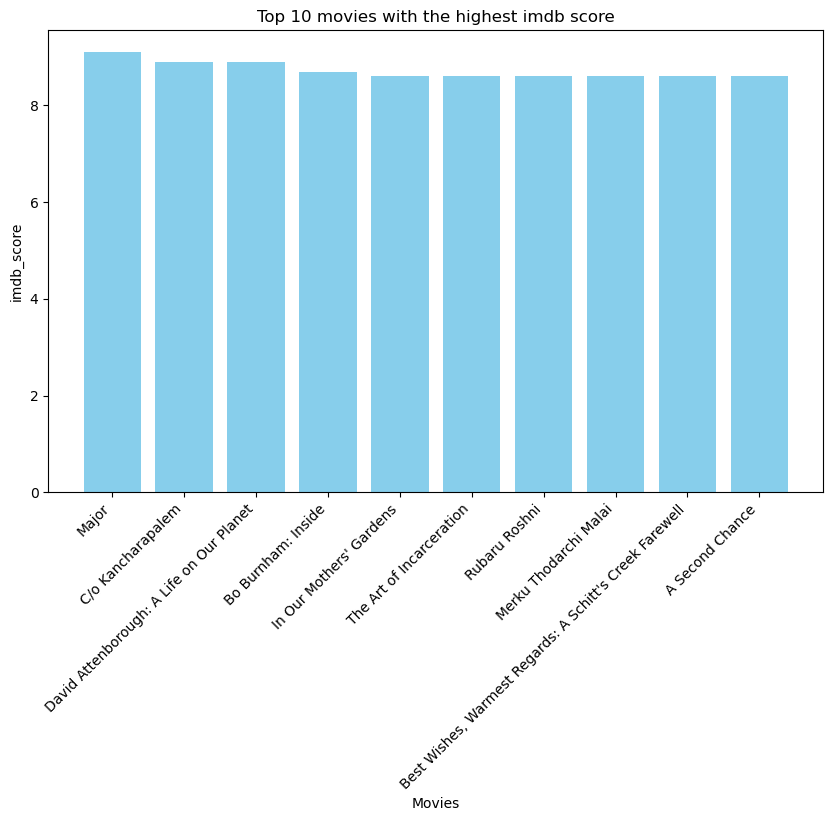

In [111]:
plt.figure(figsize=(10, 6))
plt.bar(df_temp_movies1['title'], df_temp_movies1['imdb_score'], color='skyblue')
plt.xlabel('Movies')
plt.ylabel('imdb_score')
plt.title('Top 10 movies with the highest imdb score')
plt.xticks(rotation=45, ha='right')
plt.show()